In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import graphviz
from sklearn.neural_network import MLPClassifier
from graphviz import Source
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support, classification_report
from IPython.display import SVG
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

In [2]:
#https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
df = pd.read_csv('crop_data.csv')
df = df.dropna()
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


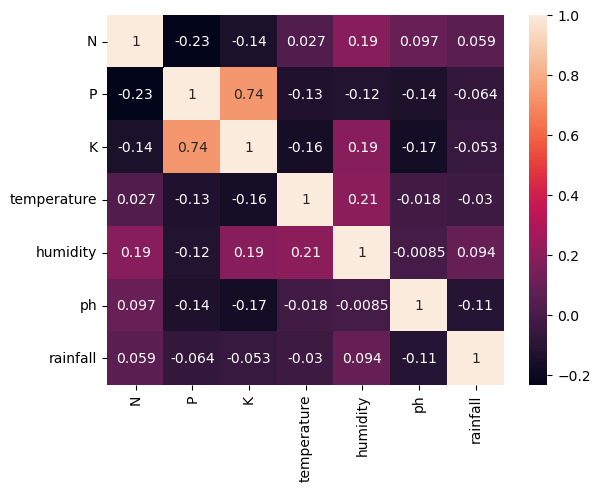

In [3]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)

In [4]:
df = df.drop("K", axis=1)
df

,N,P,temperature,humidity,ph,rainfall,label
0,90,42,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...
2195,107,34,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
display(df.label.unique())

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
def get_crop_category(crop_name):
    cereal_crops = ['rice', 'maize']
    pulse_crops = ['chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil']
    fruit_crops = ['pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut']
    fiber_cash_crops = ['cotton', 'jute', 'coffee']  
    if crop_name.lower() in cereal_crops:
        return '0'
    elif crop_name.lower() in pulse_crops:
        return '1'
    elif crop_name.lower() in fruit_crops:
        return '2'
    elif crop_name.lower() in fiber_cash_crops:
        return '3'
    else:
        return 'Unknown'   
df['label'] = df['label'].apply(get_crop_category)
display(df.label.unique())

array(['0', '1', '2', '3'], dtype=object)

In [7]:
df

,N,P,temperature,humidity,ph,rainfall,label
0,90,42,20.879744,82.002744,6.502985,202.935536,0
1,85,58,21.770462,80.319644,7.038096,226.655537,0
2,60,55,23.004459,82.320763,7.840207,263.964248,0
3,74,35,26.491096,80.158363,6.980401,242.864034,0
4,78,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...
2195,107,34,26.774637,66.413269,6.780064,177.774507,3
2196,99,15,27.417112,56.636362,6.086922,127.924610,3
2197,118,33,24.131797,67.225123,6.362608,173.322839,3
2198,117,32,26.272418,52.127394,6.758793,127.175293,3


In [8]:
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df

,N,P,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.935587,0.472666,0.043302,1.810361,0
1,0.933329,0.140616,-0.759646,0.397051,0.734873,2.242058,0
2,0.255986,0.049647,-0.515898,0.486954,1.771510,2.921066,0
3,0.635298,-0.556811,0.172807,0.389805,0.660308,2.537048,0
4,0.743673,-0.344551,-1.083647,0.454792,1.497868,2.898373,0
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,0.228814,-0.227709,0.401395,1.352437,3
2196,1.312641,-1.163269,0.355720,-0.666947,-0.494413,0.445183,3
2197,1.827421,-0.617457,-0.293218,-0.191235,-0.138120,1.271418,3
2198,1.800327,-0.647780,0.129612,-0.869518,0.373904,0.431545,3


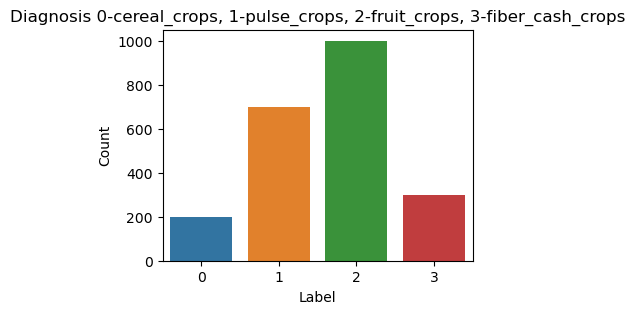

In [9]:
plt.figure(figsize=(4, 3))
sns.countplot(x = "label", data=df)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Diagnosis 0-cereal_crops, 1-pulse_crops, 2-fruit_crops, 3-fiber_cash_crops")
plt.show()

In [10]:
feature_cols = ['N', 'P', 'temperature', 'humidity', 'ph', 'rainfall']
X = df.drop("label", axis=1)
y = df.label
display(X.head())
display(y.head())

,N,P,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-1.083647,0.454792,1.497868,2.898373


0    0
1    0
2    0
3    0
4    0
Name: label, dtype: object

**Decision Tree**

In [11]:
def dt(df):
    depths = [1, 3, 5, 7, 10, 50, 100]
    results = []
    for d in depths:
        clf = tree.DecisionTreeClassifier(max_depth=d, random_state=1)
        scores = cross_val_score(clf, X, y, cv=5)
        mean_score = scores.mean()
        results.append((d, mean_score)) 
    res_df = pd.DataFrame(results, columns=['Depth', 'Avg_Cross_Acc'])
    return res_df

dt_res = dt(df)
dt_res

,Depth,Avg_Cross_Acc
0,1,0.611818
1,3,0.585909
2,5,0.621364
3,7,0.686818
4,10,0.690000
5,50,0.690909
6,100,0.690909


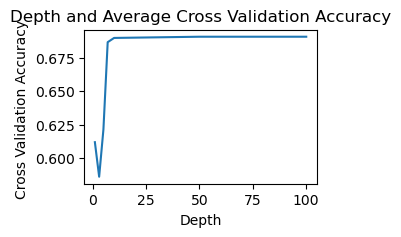

In [12]:
plt.figure(figsize = (3,2))
sns.lineplot(data=dt_res, x='Depth', y='Avg_Cross_Acc')
plt.title('Depth and Average Cross Validation Accuracy')
plt.xlabel('Depth')
plt.ylabel('Cross Validation Accuracy ')
plt.show()

In [13]:
treeclf = DecisionTreeClassifier(max_depth=1, random_state=1)
treeclf.fit(X, y)
y_pred = treeclf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.65      0.86      0.74       700
           2       0.71      0.90      0.79      1000
           3       0.00      0.00      0.00       300

    accuracy                           0.68      2200
   macro avg       0.34      0.44      0.38      2200
weighted avg       0.53      0.68      0.59      2200



C:\Users\James\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\James\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\James\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['0', '1', '2', '3'], filled = True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [15]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)
y_pred = treeclf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.50      0.66       200
           1       1.00      0.83      0.91       700
           2       0.97      0.87      0.92      1000
           3       0.48      0.99      0.65       300

    accuracy                           0.84      2200
   macro avg       0.85      0.80      0.78      2200
weighted avg       0.91      0.84      0.85      2200



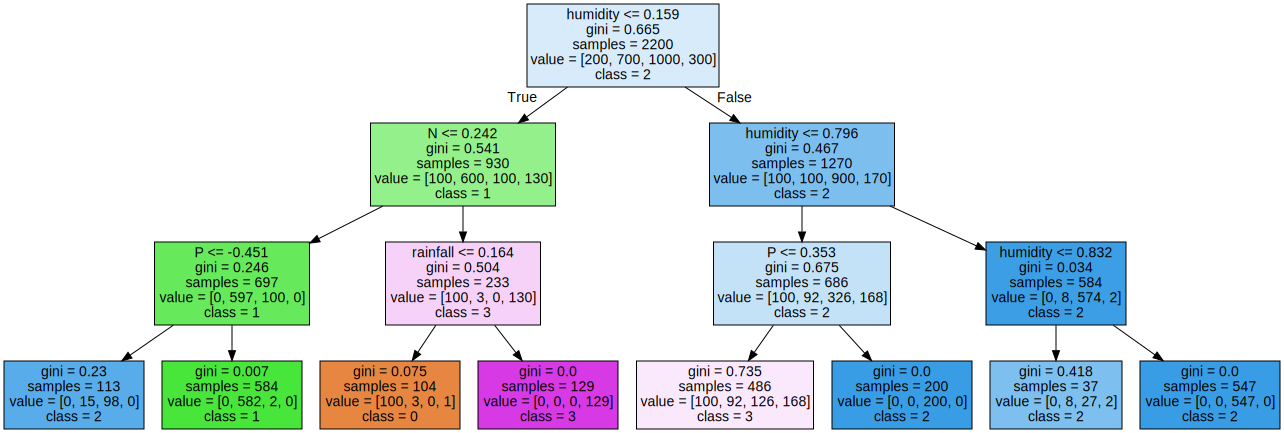

In [16]:
graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['0', '1', '2', '3'], filled = True))
display(SVG(graph.pipe(format='svg')))

In [17]:
treeclf = DecisionTreeClassifier(max_depth=10, random_state=1)
treeclf.fit(X, y)
y_pred = treeclf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       200
           1       1.00      1.00      1.00       700
           2       1.00      1.00      1.00      1000
           3       1.00      0.98      0.99       300

    accuracy                           1.00      2200
   macro avg       0.99      0.99      0.99      2200
weighted avg       1.00      1.00      1.00      2200



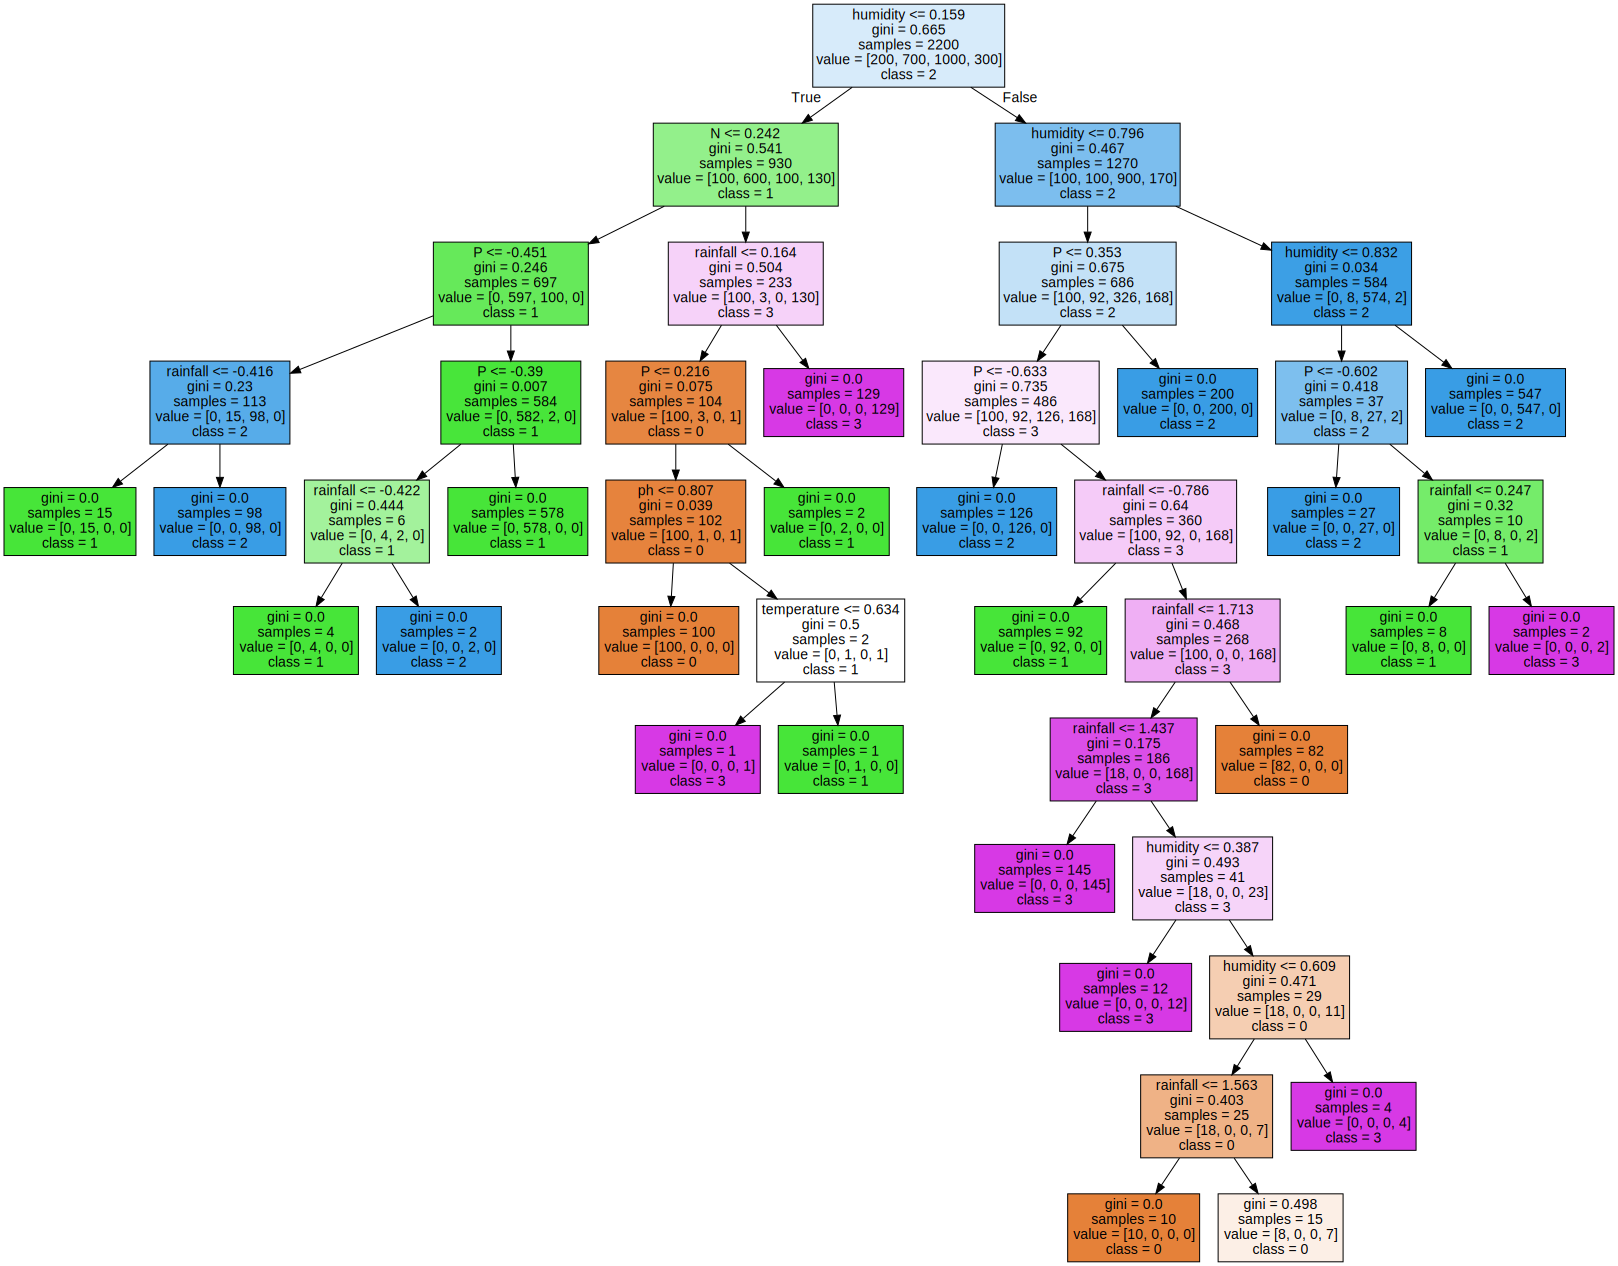

In [18]:
graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['0', '1', '2', '3'], filled = True))
display(SVG(graph.pipe(format='svg')))

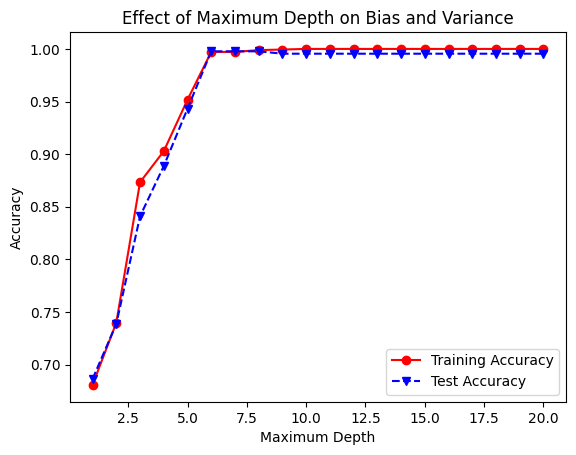

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
maxdepths = range(1, 21)
trainAcc = []
testAcc = []
for maxdepth in maxdepths:
    treeclf = DecisionTreeClassifier(max_depth=maxdepth, random_state=1)
    treeclf.fit(X_train, y_train)
    trainAcc.append(accuracy_score(y_train, treeclf.predict(X_train)))
    testAcc.append(accuracy_score(y_test, treeclf.predict(X_test)))
plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Maximum Depth on Bias and Variance')
plt.show()

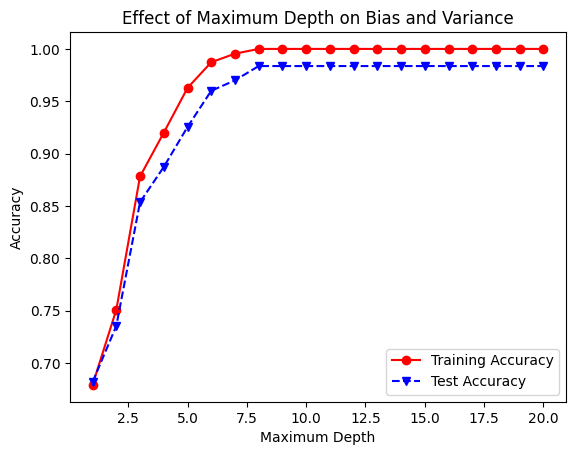

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
maxdepths = range(1, 21)
trainAcc = []
testAcc = []
for maxdepth in maxdepths:
    treeclf = DecisionTreeClassifier(max_depth=maxdepth, random_state=1)
    treeclf.fit(X_train, y_train)
    trainAcc.append(accuracy_score(y_train, treeclf.predict(X_train)))
    testAcc.append(accuracy_score(y_test, treeclf.predict(X_test)))
plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Maximum Depth on Bias and Variance')
plt.show()

**Content related to BIAS And VARIANCE:**

The depth of a decision tree can have a significant impact on both bias and variance. When a decision tree has a shallow depth, it may have high bias and low variance. This means that the tree may oversimplify the data and not capture all of the complexities of the underlying relationships. However, the tree may be more stable and generalizable to new data.

On the other hand, as the depth of the tree increases, the bias may decrease and the variance may increase. This means that the tree may better fit the training data and capture more of the complex relationships in the data, but it may become more overfit and less generalizable to new data.

To visualize the effect of depth on bias and variance, one can plot the training and validation accuracy as a function of the maximum depth. The training accuracy is expected to increase with depth, while the validation accuracy may initially increase with depth but will eventually start to decrease due to overfitting. This can help identify the optimal depth of the tree that balances bias and variance.

Regarding the choices the algorithm makes in which attributes to split on, at a given tree level, not all nodes necessarily split on the same attribute. The algorithm uses a heuristic to determine which attribute to split on based on the impurity reduction. It evaluates each possible split and selects the one that results in the largest impurity reduction. This process is repeated recursively for each resulting node until a stopping criterion is met (e.g., maximum depth reached or minimum number of samples in a leaf node). Therefore, different nodes may split on different attributes based on the distribution of the data at that specific node.

The incline in the line from depths 1 to 6 indicates that increasing the maximum depth of the decision tree results in an improvement in both training and testing accuracies. This suggests that increasing the complexity of the decision tree model up to a certain point can improve its performance.

However, after a certain depth (in this case, 6), the testing accuracy stops improving and starts to flatten out, while the training accuracy continues to improve. This suggests that the model is overfitting to the training data and is not generalizing well to new, unseen data. This is indicated by the decrease in the gap between the training and testing accuracies as the depth increases.

Therefore, the optimal depth for this decision tree model would be around 6, where the testing accuracy starts to plateau and the gap between the training and testing accuracies is relatively small. This would result in a model with a good balance of bias and variance, and would generalize well to new data.

**Choices the algorithm makes in which attributes to split on**

The decision tree algorithm makes choices on which attributes to split on based on their ability to increase the homogeneity of the target variable (i.e., to make the resulting subsets more pure). At each level of the tree, the algorithm selects the attribute that results in the largest information gain or decrease in impurity (e.g., using Gini impurity or entropy).

It is not necessary for all nodes at a given tree level to split on the same attribute, as the algorithm may choose different attributes at different nodes to optimize the overall impurity reduction. However, in some cases, different attributes may result in the same information gain, in which case the algorithm may choose any of them for the split.

It is worth noting that the attribute selection process can be influenced by the method used to measure impurity, the algorithm's hyperparameters (e.g., maximum depth, minimum samples per leaf), and the quality of the training data (e.g., feature importance, collinearity). It is therefore important to tune the hyperparameters and preprocess the data appropriately to achieve the best performance of the decision tree algorithm.

**Neural Network**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=5000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[ 29   0   0   4]
 [  0 142   0   0]
 [  2   1 197   1]
 [  3   0   1  60]]


In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.96      0.99      0.97       142
           2       0.98      0.96      0.97       201
           3       0.91      0.95      0.93        64

    accuracy                           0.96       440
   macro avg       0.93      0.94      0.93       440
weighted avg       0.96      0.96      0.96       440



In [26]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))


This dataset has 6 input nodes and 4 output node(s)
There are 2 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 6x5 (6 nodes feeding into a layer of 5 nodes)
  1: 5x4 (5 nodes feeding into a layer of 4 nodes)

There are 2 1D arrays of intercepts, one for each layer
Each layer has [5, 4] intercepts, one for each node


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 14   3   0  16]
 [  0 139   3   0]
 [  0   4 191   6]
 [  2   0   6  56]]


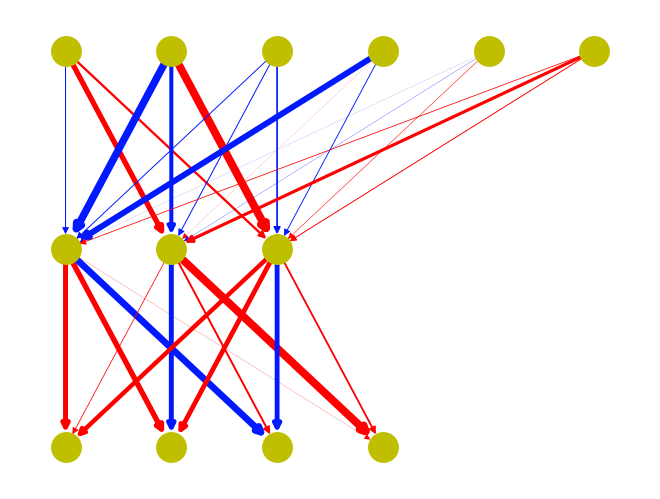

In [27]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

mlp = MLPClassifier(hidden_layer_sizes=(3),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)

Architecture 1:
[[ 28   0   0   5]
 [  0 141   1   0]
 [  3   1 196   1]
 [  6   0   1  57]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.99      0.99      0.99       142
           2       0.99      0.98      0.98       201
           3       0.90      0.89      0.90        64

    accuracy                           0.96       440
   macro avg       0.91      0.93      0.92       440
weighted avg       0.96      0.96      0.96       440

Architecture 2:
[[ 31   0   0   2]
 [  0 142   0   0]
 [  1   1 199   0]
 [  0   0   0  64]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.99      1.00      1.00       142
           2       1.00      0.99      0.99       201
           3       0.97      1.00      0.98        64

    accuracy                           0.99       440
   macro avg       0.98      0.98      0.98       440

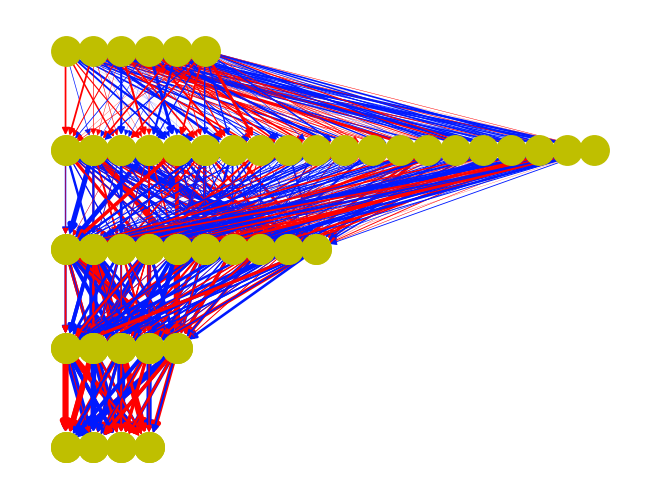

In [31]:
architectures = [
    {'hidden_layer_sizes': (5,), 'max_iter': 5000},
    {'hidden_layer_sizes': (10, 5), 'max_iter': 5000},
    {'hidden_layer_sizes': (20, 10, 5), 'max_iter': 5000}]
for i, arch in enumerate(architectures):
    # train the model
    mlp = MLPClassifier(**arch)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    print(f'Architecture {i+1}:')
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    show_ann(mlp)


From the confusion matrices and classification reports for the three architectures, we can see that:

Architecture 2 (with hidden layer sizes of (10, 5)) performs the best, achieving a high accuracy score of 0.99 and high precision, recall, and F1 scores for all four classes. This indicates that this architecture is able to effectively classify the data.
Architecture 1 (with hidden layer sizes of (5,)) and Architecture 3 (with hidden layer sizes of (20, 10, 5)) also perform well, with accuracy scores of 0.96 and 0.97 respectively, and high precision, recall, and F1 scores for most classes. However, there are some classes where the precision, recall, or F1 score is lower, indicating that these architectures may not be as effective at classifying those particular classes.
Overall, it seems that using a neural network with two hidden layers (such as Architecture 2) is a good choice for this classification task, but Architecture 1 and Architecture 3 also perform reasonably well.